In [4]:
# Rename me from MachineLearningOG_A to iPythonExample_OG_stepB
workarea = "/Users/dork/Home/GithubRepo/"
file_storage = workarea+"Files/"

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor,MultiOutputClassifier
from sklearn.model_selection import train_test_split
import joblib
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from scipy.stats import pearsonr

from sklearn import datasets
from sklearn.model_selection  import GridSearchCV

import tables
import pylab as pl

import math

import pickle

import EmilysTools
from EmilysTools import Grabber, DataGrabber, llh_check, PassedG1Cuts, PassedDataG1Cuts

In [6]:
matplotlib.rc('font', size=24)
combo_number = 1
num_tree = 500
test_size = 0.33
mx_depth = 1000
crit = 'mse'
boot = True
rdm_st = 42
oob = True
num_trees = [50,100,500,1000,1500,2000,2500,3000,3500]

mass = [1,56]
primary_label=['H','Fe']
color =['r','b']
 
feat_names = ['s125','zenith','e_loss','n_he_stoc','n_he_stoc_hi']
#feat_names = ['s125','zenith','e_loss']

cl_names = ['Ene']
#cl_names = ['Ene','Mas']

Nbins = 30
eng_bins = np.logspace(5.0,9.5,Nbins)

In [65]:
sim_type = "stepA_OGall"
my_itP_og = pickle.load( open( file_storage+sim_type+"_ic86_goodA_p_le.pkl", "rb" ) )
my_itF_og = pickle.load( open( file_storage+sim_type+"_ic86_goodA_i_le.pkl", "rb" ) )

In [10]:
for key in my_itP_og.keys():
    print(key)

good_ElossReco_IT_mpeLLH_itSEEDMilliNCascAbove2
good_ElossReco_IT_mpeLLH_itSEEDMilliQtotRatio
good_ElossReco_IT_mpeLLH_itSEEDMilliRloglBelow2
good_ElossReco_IT_mpeLLH_itSEEDStochRecoSucceeded
good_ElossReco_II_speLLH_mpeSEEDMilliNCascAbove2
good_ElossReco_II_speLLH_mpeSEEDMilliQtotRatio
good_ElossReco_II_speLLH_mpeSEEDMilliRloglBelow2
good_ElossReco_II_speLLH_mpeSEEDStochRecoSucceeded
BetaCutPassed
IceTopMaxSignalAbove6
IceTopMaxSignalInside
IceTopNeighbourMaxSignalAbove4
IceTop_StandardFilter
IceTop_reco_succeeded
Laputop_FractionContainment
StationDensity_passed
MilliNCascAbove2
MilliQtotRatio
MilliRloglBelow2
NCh_CoincLaputopCleanedPulsesAbove7
StochRecoSucceeded
IT_mpeLLH_itSEED_x
IT_mpeLLH_itSEED_y
IT_mpeLLH_itSEED_z
IT_mpeLLH_itSEED_time
IT_mpeLLH_itSEED_zenith
IT_mpeLLH_itSEED_azimuth
IT_mpeLLH_itSEED_energy
IT_mpeLLH_itSEED_speed
IT_mpeLLH_itSEED_length
IT_mpeLLH_itSEED_pdg_encoding
IT_mpeLLH_itSEED_type
IT_mpeLLH_itSEED_shape
IT_mpeLLH_itSEED_location
IT_mpeLLH_itSEED_fit_stat

In [11]:
s125 = np.log10(my_itP_og['LaputopParams_s125']).append(np.log10(my_itF_og['LaputopParams_s125']))
beta = my_itP_og['LaputopParams_beta'].append(my_itF_og['LaputopParams_beta'])


In [12]:
#s125 = my_itP_g1['LaputopParams_Log10_S125'].append(my_itF_g1['LaputopParams_Log10_S125'])
zenith = my_itP_og['Laputop_coszen'].append(my_itF_og['Laputop_coszen'])
e_loss = my_itP_og['Stoch_Reco_eloss_1500'].append(my_itF_og['Stoch_Reco_eloss_1500'])
n_he_stoc = my_itP_og['Stoch_Reco_n_he_stoch'].append(my_itF_og['Stoch_Reco_n_he_stoch'])
n_he_stoc_hi = my_itP_og['Stoch_Reco2_n_he_stoch'].append(my_itF_og['Stoch_Reco2_n_he_stoch'])
mc_weig = my_itP_og['Weighting_value'].append(my_itF_og['Weighting_value'])
mc_ene = my_itP_og['MCPrimary_energy']
mc_mass = np.ones(len(my_itP_og['MCPrimary_energy'])*1)
mc_ene = mc_ene.append(my_itF_og['MCPrimary_energy'])
mc_mass = np.concatenate((mc_mass,np.full(len(my_itF_og['MCPrimary_energy']),56)),axis=0)

In [13]:
detector_output, physic_output = list(zip(s125,beta,zenith,e_loss,n_he_stoc,n_he_stoc_hi)), list(zip(mc_ene,mc_mass))

In [14]:
mc_weig = my_itP_og['Weighting_value'].append(my_itF_og['Weighting_value'])

In [15]:
#L_train, L_test, y_train, y_test , mass_train, mass_test,weig_train,weig_test= train_test_split(detector_output_scaled, physic_output,mass_output,mc_weig, test_size=test_size, random_state=rdm_st)
X_train, X_test, y_train, y_test, weight_train, weight_test, = train_test_split(detector_output, physic_output,mc_weig, test_size=test_size, random_state=rdm_st)

In [16]:
#max_depth=mx_depth,random_state=rdm_st,bootstrap=boot,verbose=True,oob_score=oob,n_jobs=4
regr_multi_rf = RandomForestRegressor(criterion=crit, n_estimators=num_tree, max_depth=mx_depth,random_state=rdm_st,bootstrap=boot,verbose=True,oob_score=oob,n_jobs=6)

In [17]:
regr_multi_rf.fit(X_train,y_train)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    2.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    8.9s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   21.0s
[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:   24.0s finished


RandomForestRegressor(max_depth=1000, n_estimators=500, n_jobs=6,
                      oob_score=True, random_state=42, verbose=True)

In [18]:
pred = regr_multi_rf.predict(X_test)  

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:    0.8s finished


0.776091932373568


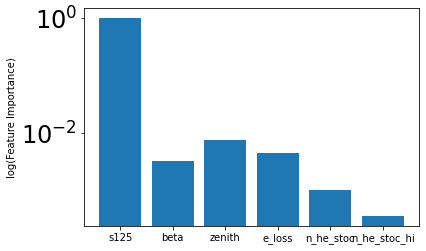

In [19]:
print(regr_multi_rf.oob_score_)
importt = regr_multi_rf.feature_importances_
feat_names = ['s125','beta','zenith','e_loss','n_he_stoc','n_he_stoc_hi']
feat_nums = [1,2,3,4,5,6]
feat_namesC = ['s125','beta','C_{2}','zenith','e_loss','n_he_stoc','n_he_stoc_hi','n_he_stoc_dE']
feat_numsC = [1,2,3,4,5,6,7,8]
fig1, ax1 = plt.subplots(1,1)
ax1.bar(feat_nums,importt)
plt.xticks(feat_nums, feat_names,fontsize=10)
plt.ylabel("log(Feature Importance)",fontsize=10)
ax1.set_yscale('log')

In [20]:
joblib.dump(regr_multi_rf,file_storage+'stepB_final_rft_regressor_combo_'+sim_type+'.pkl')
joblib.dump(pred,file_storage+'stepB_final_predX_'+sim_type+'.pkl')

['/Users/dork/Home/GithubRepo/Files/stepB_final_predX_stepA_OGall.pkl']

In [21]:
eng_detector_output, eng_physic_output = list(zip(s125,beta,zenith,e_loss,n_he_stoc,n_he_stoc_hi)), list(zip(mc_ene))

In [22]:
eng_X_train, eng_X_test, eng_y_train, eng_y_test, eng_weight_train, eng_weight_test, = train_test_split(eng_detector_output, eng_physic_output,mc_weig, test_size=test_size, random_state=rdm_st)

In [23]:
eng_regr_multi_rf = RandomForestRegressor(criterion=crit, n_estimators=num_tree, max_depth=mx_depth,random_state=rdm_st,bootstrap=boot,verbose=True,oob_score=oob,n_jobs=6)

In [24]:
eng_regr_multi_rf.fit(eng_X_train,eng_y_train)

<ipython-input-24-2fce794a6fc5>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  eng_regr_multi_rf.fit(eng_X_train,eng_y_train)
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    2.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    9.1s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   20.5s
[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:   23.3s finished


RandomForestRegressor(max_depth=1000, n_estimators=500, n_jobs=6,
                      oob_score=True, random_state=42, verbose=True)

In [25]:
eng_pred = eng_regr_multi_rf.predict(eng_X_test)  


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:    1.1s finished


0.9857743542525403


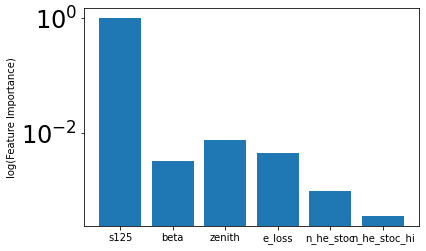

In [26]:
print(eng_regr_multi_rf.oob_score_)
eng_importt = eng_regr_multi_rf.feature_importances_
feat_names = ['s125','beta','zenith','e_loss','n_he_stoc','n_he_stoc_hi']
feat_nums = [1,2,3,4,5,6]
feat_namesC = ['s125','beta','C_{2}','zenith','e_loss','n_he_stoc','n_he_stoc_hi','n_he_stoc_dE']
feat_numsC = [1,2,3,4,5,6,7,8]
fig1, ax1 = plt.subplots(1,1)
ax1.bar(feat_nums,eng_importt)
plt.xticks(feat_nums, feat_names,fontsize=10)
plt.ylabel("log(Feature Importance)",fontsize=10)
ax1.set_yscale('log')

In [27]:
joblib.dump(eng_regr_multi_rf,file_storage+'stepB_eng_rft_regressor_combo_'+sim_type+'.pkl')

['/Users/dork/Home/GithubRepo/Files/stepB_eng_rft_regressor_combo_stepA_OGall.pkl']

In [28]:
mass_detector_output, mass_physic_output = list(zip(s125,beta,zenith,e_loss,n_he_stoc,n_he_stoc_hi)), list(zip(mc_mass))

In [29]:
mass_X_train, mass_X_test, mass_y_train, mass_y_test, mass_weight_train, mass_weight_test, = train_test_split(mass_detector_output, mass_physic_output,mc_weig, test_size=test_size, random_state=rdm_st)

In [30]:
mass_regr_multi_rf = RandomForestRegressor(criterion=crit, n_estimators=num_tree, max_depth=mx_depth,random_state=rdm_st,bootstrap=boot,verbose=True,oob_score=oob,n_jobs=6)

In [31]:
mass_regr_multi_rf.fit(mass_X_train,mass_y_train)

<ipython-input-31-1e029cab763d>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mass_regr_multi_rf.fit(mass_X_train,mass_y_train)
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    6.4s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   14.9s
[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:   16.9s finished


RandomForestRegressor(max_depth=1000, n_estimators=500, n_jobs=6,
                      oob_score=True, random_state=42, verbose=True)

In [32]:
mass_pred = mass_regr_multi_rf.predict(mass_X_test) 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:    0.3s finished


0.5879318693390247


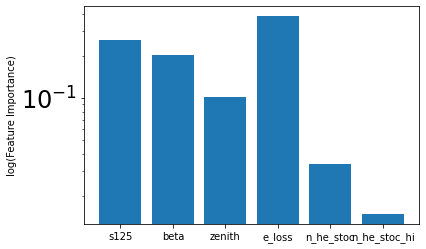

In [33]:
print(mass_regr_multi_rf.oob_score_)
mass_importt = mass_regr_multi_rf.feature_importances_
feat_names = ['s125','beta','zenith','e_loss','n_he_stoc','n_he_stoc_hi']
feat_nums = [1,2,3,4,5,6]
feat_namesC = ['s125','beta','C_{2}','zenith','e_loss','n_he_stoc','n_he_stoc_hi','n_he_stoc_dE']
feat_numsC = [1,2,3,4,5,6,7,8]
fig1, ax1 = plt.subplots(1,1)
ax1.bar(feat_nums,mass_importt)
plt.xticks(feat_nums, feat_names,fontsize=10)
plt.ylabel("log(Feature Importance)",fontsize=10)
ax1.set_yscale('log')

In [34]:
joblib.dump(mass_regr_multi_rf,file_storage+'stepB_mass_rft_regressor_combo_'+sim_type+'.pkl')


['/Users/dork/Home/GithubRepo/Files/stepB_mass_rft_regressor_combo_stepA_OGall.pkl']

In [38]:
sim_type = "stepA_3Dg1"
my_itP_g1 = pickle.load( open( file_storage+sim_type+"_ic86_goodA_p_le.pkl", "rb" ) )
my_itF_g1 = pickle.load( open( file_storage+sim_type+"_ic86_goodA_i_le.pkl", "rb" ) )

In [39]:
s125 = my_itP_g1['IT_mpeLLH_itSEEDParams_Log10_S125'].append(my_itF_g1['IT_mpeLLH_itSEEDParams_Log10_S125'])
beta = my_itP_g1['IT_mpeLLH_itSEEDParams_Beta'].append(my_itF_g1['IT_mpeLLH_itSEEDParams_Beta'])
zenith = my_itP_g1['IT_mpeLLH_itSEED_coszen'].append(my_itF_g1['IT_mpeLLH_itSEED_coszen'])
e_loss = my_itP_g1['good_ElossReco_IT_mpeLLH_itSEEDStoch_Reco_EM_eloss_1500'].append(my_itF_g1['good_ElossReco_IT_mpeLLH_itSEEDStoch_Reco_EM_eloss_1500'])
n_he_stoc = my_itP_g1['good_ElossReco_IT_mpeLLH_itSEEDStoch_Reco_EM_n_he_stoch'].append(my_itF_g1['good_ElossReco_IT_mpeLLH_itSEEDStoch_Reco_EM_n_he_stoch'])
n_he_stoc_hi = my_itP_g1['good_ElossReco_IT_mpeLLH_itSEEDStoch_Reco2_EM_n_he_stoch'].append(my_itF_g1['good_ElossReco_IT_mpeLLH_itSEEDStoch_Reco2_EM_n_he_stoch'])
mc_weig = my_itP_g1['Weighting_value'].append(my_itF_g1['Weighting_value'])
mc_ene = my_itP_g1['MCPrimary_energy']
mc_ene = mc_ene.append(my_itF_g1['MCPrimary_energy'])
mc_mass = (my_itP_g1['IT_mpeLLH_itSEED_coszen']/my_itP_g1['IT_mpeLLH_itSEED_coszen'])*1.#my_itP_g1['SimmMass']
mc_mass = mc_mass.append((my_itF_g1['IT_mpeLLH_itSEED_coszen']/my_itF_g1['IT_mpeLLH_itSEED_coszen'])*56.)
mc_weig = my_itP_g1['Weighting_value'].append(my_itF_g1['Weighting_value'])

In [40]:
detector_output, physic_output = list(zip(s125,beta,zenith,e_loss,n_he_stoc,n_he_stoc_hi)), list(zip(mc_ene,mc_mass))

In [41]:
X_train, X_test, y_train, y_test, weight_train, weight_test, = train_test_split(detector_output, physic_output,mc_weig, test_size=test_size, random_state=rdm_st)

In [42]:
regr_multi_rf = RandomForestRegressor(criterion=crit, n_estimators=num_tree, max_depth=mx_depth,random_state=rdm_st,bootstrap=boot,verbose=True,oob_score=oob,n_jobs=6)

In [43]:
regr_multi_rf.fit(X_train,y_train)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    7.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   16.3s
[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:   18.5s finished


RandomForestRegressor(max_depth=1000, n_estimators=500, n_jobs=6,
                      oob_score=True, random_state=42, verbose=True)

In [44]:
pred = regr_multi_rf.predict(X_test)  

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:    0.5s finished


0.808382600044371


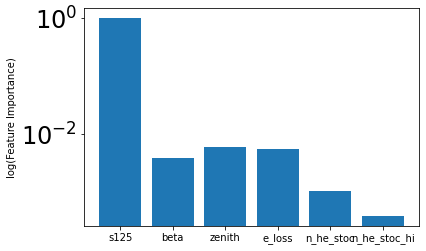

In [45]:
print(regr_multi_rf.oob_score_)
importt = regr_multi_rf.feature_importances_
feat_names = ['s125','beta','zenith','e_loss','n_he_stoc','n_he_stoc_hi']
feat_nums = [1,2,3,4,5,6]
feat_namesC = ['s125','beta','C_{2}','zenith','e_loss','n_he_stoc','n_he_stoc_hi','n_he_stoc_dE']
feat_numsC = [1,2,3,4,5,6,7,8]
fig1, ax1 = plt.subplots(1,1)
ax1.bar(feat_nums,importt)
plt.xticks(feat_nums, feat_names,fontsize=10)
plt.ylabel("log(Feature Importance)",fontsize=10)
ax1.set_yscale('log')

In [46]:
joblib.dump(regr_multi_rf,file_storage+'stepB_final_rft_regressor_combo_'+sim_type+'.pkl')
joblib.dump(pred,file_storage+'stepB_final_predX_'+sim_type+'.pkl')

['/Users/dork/Home/GithubRepo/Files/stepB_final_predX_stepA_3Dg1.pkl']

In [47]:
eng_detector_output, eng_physic_output = list(zip(s125,beta,zenith,e_loss,n_he_stoc,n_he_stoc_hi)), list(zip(mc_ene))

In [48]:
eng_X_train, eng_X_test, eng_y_train, eng_y_test, eng_weight_train, eng_weight_test, = train_test_split(eng_detector_output, eng_physic_output,mc_weig, test_size=test_size, random_state=rdm_st)

In [49]:
eng_regr_multi_rf = RandomForestRegressor(criterion=crit, n_estimators=num_tree, max_depth=mx_depth,random_state=rdm_st,bootstrap=boot,verbose=True,oob_score=oob,n_jobs=6)

In [50]:
eng_regr_multi_rf.fit(eng_X_train,eng_y_train)

<ipython-input-50-2fce794a6fc5>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  eng_regr_multi_rf.fit(eng_X_train,eng_y_train)
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    6.9s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   16.2s
[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:   18.5s finished


RandomForestRegressor(max_depth=1000, n_estimators=500, n_jobs=6,
                      oob_score=True, random_state=42, verbose=True)

In [51]:
eng_pred = eng_regr_multi_rf.predict(eng_X_test)  


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:    0.5s finished


0.9836795067607061


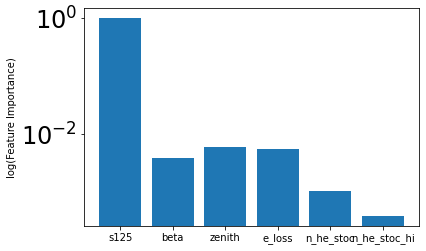

In [52]:
print(eng_regr_multi_rf.oob_score_)
eng_importt = eng_regr_multi_rf.feature_importances_
feat_names = ['s125','beta','zenith','e_loss','n_he_stoc','n_he_stoc_hi']
feat_nums = [1,2,3,4,5,6]
feat_namesC = ['s125','beta','C_{2}','zenith','e_loss','n_he_stoc','n_he_stoc_hi','n_he_stoc_dE']
feat_numsC = [1,2,3,4,5,6,7,8]
fig1, ax1 = plt.subplots(1,1)
ax1.bar(feat_nums,eng_importt)
plt.xticks(feat_nums, feat_names,fontsize=10)
plt.ylabel("log(Feature Importance)",fontsize=10)
ax1.set_yscale('log')

In [53]:
joblib.dump(eng_regr_multi_rf,file_storage+'stepB_eng_rft_regressor_combo_'+sim_type+'.pkl')

['/Users/dork/Home/GithubRepo/Files/stepB_eng_rft_regressor_combo_stepA_3Dg1.pkl']

In [54]:
mass_detector_output, mass_physic_output = list(zip(s125,beta,zenith,e_loss,n_he_stoc,n_he_stoc_hi)), list(zip(mc_mass))

In [55]:
mass_X_train, mass_X_test, mass_y_train, mass_y_test, mass_weight_train, mass_weight_test, = train_test_split(mass_detector_output, mass_physic_output,mc_weig, test_size=test_size, random_state=rdm_st)

In [56]:
mass_regr_multi_rf = RandomForestRegressor(criterion=crit, n_estimators=num_tree, max_depth=mx_depth,random_state=rdm_st,bootstrap=boot,verbose=True,oob_score=oob,n_jobs=6)

In [57]:
mass_regr_multi_rf.fit(mass_X_train,mass_y_train)

<ipython-input-57-1e029cab763d>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mass_regr_multi_rf.fit(mass_X_train,mass_y_train)
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    4.4s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   10.2s
[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:   11.5s finished


RandomForestRegressor(max_depth=1000, n_estimators=500, n_jobs=6,
                      oob_score=True, random_state=42, verbose=True)

In [58]:
mass_pred = mass_regr_multi_rf.predict(mass_X_test) 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:    0.2s finished


0.669053490319722


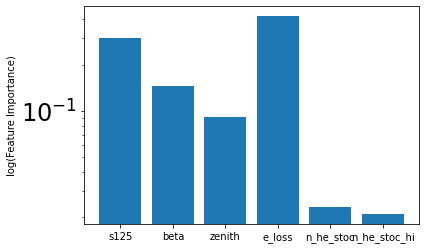

In [59]:
print(mass_regr_multi_rf.oob_score_)
mass_importt = mass_regr_multi_rf.feature_importances_
feat_names = ['s125','beta','zenith','e_loss','n_he_stoc','n_he_stoc_hi']
feat_nums = [1,2,3,4,5,6]
feat_namesC = ['s125','beta','C_{2}','zenith','e_loss','n_he_stoc','n_he_stoc_hi','n_he_stoc_dE']
feat_numsC = [1,2,3,4,5,6,7,8]
fig1, ax1 = plt.subplots(1,1)
ax1.bar(feat_nums,mass_importt)
plt.xticks(feat_nums, feat_names,fontsize=10)
plt.ylabel("log(Feature Importance)",fontsize=10)
ax1.set_yscale('log')

In [60]:
joblib.dump(mass_regr_multi_rf,file_storage+'stepB_mass_rft_regressor_combo_'+sim_type+'.pkl')


['/Users/dork/Home/GithubRepo/Files/stepB_mass_rft_regressor_combo_stepA_3Dg1.pkl']

In [66]:
sim_type = "stepA_3Dg2"
my_itP_g2 = pickle.load( open( file_storage+sim_type+"_ic86_goodA_p_le.pkl", "rb" ) )
my_itF_g2 = pickle.load( open( file_storage+sim_type+"_ic86_goodA_i_le.pkl", "rb" ) )

In [69]:
s125 = my_itP_g2['II_speLLH_mpeSEEDParams_Log10_S125'].append(my_itF_g2['II_speLLH_mpeSEEDParams_Log10_S125'])
beta = my_itP_g2['II_speLLH_mpeSEEDParams_Beta'].append(my_itF_g2['II_speLLH_mpeSEEDParams_Beta'])
zenith = my_itP_g2['II_speLLH_mpeSEED_coszen'].append(my_itF_g2['II_speLLH_mpeSEED_coszen'])
e_loss = my_itP_g2['good_ElossReco_II_speLLH_mpeSEEDStoch_Reco_EM_eloss_1500'].append(my_itF_g2['good_ElossReco_II_speLLH_mpeSEEDStoch_Reco_EM_eloss_1500'])
n_he_stoc = my_itP_g2['good_ElossReco_II_speLLH_mpeSEEDStoch_Reco_EM_n_he_stoch'].append(my_itF_g2['good_ElossReco_II_speLLH_mpeSEEDStoch_Reco_EM_n_he_stoch'])
n_he_stoc_hi = my_itP_g2['good_ElossReco_II_speLLH_mpeSEEDStoch_Reco2_EM_n_he_stoch'].append(my_itF_g2['good_ElossReco_II_speLLH_mpeSEEDStoch_Reco2_EM_n_he_stoch'])
mc_weig = my_itP_g2['Weighting_value'].append(my_itF_g2['Weighting_value'])
mc_ene = my_itP_g2['MCPrimary_energy']
mc_ene = mc_ene.append(my_itF_g2['MCPrimary_energy'])
mc_mass = (my_itP_g2['II_speLLH_mpeSEED_coszen']/my_itP_g2['II_speLLH_mpeSEED_coszen'])*1.#my_itP_g1['SimmMass']
mc_mass = mc_mass.append((my_itF_g2['II_speLLH_mpeSEED_coszen']/my_itF_g2['II_speLLH_mpeSEED_coszen'])*56.)
mc_weig = my_itP_g2['Weighting_value'].append(my_itF_g2['Weighting_value'])

In [70]:
detector_output, physic_output = list(zip(s125,beta,zenith,e_loss,n_he_stoc,n_he_stoc_hi)), list(zip(mc_ene,mc_mass))

In [71]:
X_train, X_test, y_train, y_test, weight_train, weight_test, = train_test_split(detector_output, physic_output,mc_weig, test_size=test_size, random_state=rdm_st)

In [72]:
regr_multi_rf = RandomForestRegressor(criterion=crit, n_estimators=num_tree, max_depth=mx_depth,random_state=rdm_st,bootstrap=boot,verbose=True,oob_score=oob,n_jobs=6)

In [73]:
regr_multi_rf.fit(X_train,y_train)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    5.5s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   13.4s
[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:   15.3s finished


RandomForestRegressor(max_depth=1000, n_estimators=500, n_jobs=6,
                      oob_score=True, random_state=42, verbose=True)

In [74]:
pred = regr_multi_rf.predict(X_test)  

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:    0.4s finished


0.6877513463665769


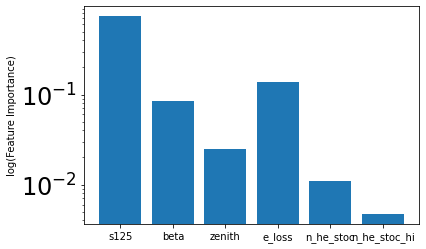

In [75]:
print(regr_multi_rf.oob_score_)
importt = regr_multi_rf.feature_importances_
feat_names = ['s125','beta','zenith','e_loss','n_he_stoc','n_he_stoc_hi']
feat_nums = [1,2,3,4,5,6]
feat_namesC = ['s125','beta','C_{2}','zenith','e_loss','n_he_stoc','n_he_stoc_hi','n_he_stoc_dE']
feat_numsC = [1,2,3,4,5,6,7,8]
fig1, ax1 = plt.subplots(1,1)
ax1.bar(feat_nums,importt)
plt.xticks(feat_nums, feat_names,fontsize=10)
plt.ylabel("log(Feature Importance)",fontsize=10)
ax1.set_yscale('log')

In [76]:
joblib.dump(regr_multi_rf,file_storage+'stepB_final_rft_regressor_combo_'+sim_type+'.pkl')
joblib.dump(pred,file_storage+'stepB_final_predX_'+sim_type+'.pkl')

['/Users/dork/Home/GithubRepo/Files/stepB_final_predX_stepA_3Dg2.pkl']

In [77]:
eng_detector_output, eng_physic_output = list(zip(s125,beta,zenith,e_loss,n_he_stoc,n_he_stoc_hi)), list(zip(mc_ene))

In [78]:
eng_X_train, eng_X_test, eng_y_train, eng_y_test, eng_weight_train, eng_weight_test, = train_test_split(eng_detector_output, eng_physic_output,mc_weig, test_size=test_size, random_state=rdm_st)

In [79]:
eng_regr_multi_rf = RandomForestRegressor(criterion=crit, n_estimators=num_tree, max_depth=mx_depth,random_state=rdm_st,bootstrap=boot,verbose=True,oob_score=oob,n_jobs=6)

In [80]:
eng_regr_multi_rf.fit(eng_X_train,eng_y_train)

<ipython-input-80-2fce794a6fc5>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  eng_regr_multi_rf.fit(eng_X_train,eng_y_train)
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    5.3s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   12.0s
[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:   13.6s finished


RandomForestRegressor(max_depth=1000, n_estimators=500, n_jobs=6,
                      oob_score=True, random_state=42, verbose=True)

In [81]:
eng_pred = eng_regr_multi_rf.predict(eng_X_test)  

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:    0.4s finished


0.8877031161826453


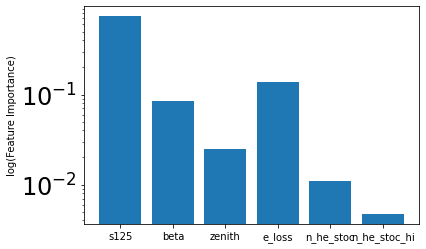

In [82]:
print(eng_regr_multi_rf.oob_score_)
eng_importt = eng_regr_multi_rf.feature_importances_
feat_names = ['s125','beta','zenith','e_loss','n_he_stoc','n_he_stoc_hi']
feat_nums = [1,2,3,4,5,6]
feat_namesC = ['s125','beta','C_{2}','zenith','e_loss','n_he_stoc','n_he_stoc_hi','n_he_stoc_dE']
feat_numsC = [1,2,3,4,5,6,7,8]
fig1, ax1 = plt.subplots(1,1)
ax1.bar(feat_nums,eng_importt)
plt.xticks(feat_nums, feat_names,fontsize=10)
plt.ylabel("log(Feature Importance)",fontsize=10)
ax1.set_yscale('log')

In [83]:
joblib.dump(eng_regr_multi_rf,file_storage+'stepB_eng_rft_regressor_combo_'+sim_type+'.pkl')

['/Users/dork/Home/GithubRepo/Files/stepB_eng_rft_regressor_combo_stepA_3Dg2.pkl']

In [84]:
mass_detector_output, mass_physic_output = list(zip(s125,beta,zenith,e_loss,n_he_stoc,n_he_stoc_hi)), list(zip(mc_mass))

In [85]:
mass_X_train, mass_X_test, mass_y_train, mass_y_test, mass_weight_train, mass_weight_test, = train_test_split(mass_detector_output, mass_physic_output,mc_weig, test_size=test_size, random_state=rdm_st)

In [86]:
mass_regr_multi_rf = RandomForestRegressor(criterion=crit, n_estimators=num_tree, max_depth=mx_depth,random_state=rdm_st,bootstrap=boot,verbose=True,oob_score=oob,n_jobs=6)

In [87]:
mass_regr_multi_rf.fit(mass_X_train,mass_y_train)

<ipython-input-87-1e029cab763d>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mass_regr_multi_rf.fit(mass_X_train,mass_y_train)
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    8.8s
[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:   10.0s finished


RandomForestRegressor(max_depth=1000, n_estimators=500, n_jobs=6,
                      oob_score=True, random_state=42, verbose=True)

In [88]:
mass_pred = mass_regr_multi_rf.predict(mass_X_test) 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:    0.2s finished


0.49786559979590284


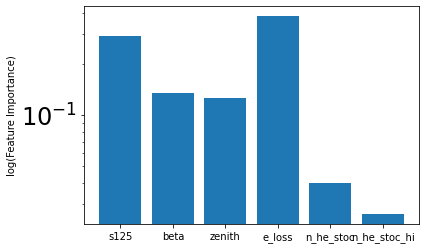

In [89]:
print(mass_regr_multi_rf.oob_score_)
mass_importt = mass_regr_multi_rf.feature_importances_
feat_names = ['s125','beta','zenith','e_loss','n_he_stoc','n_he_stoc_hi']
feat_nums = [1,2,3,4,5,6]
feat_namesC = ['s125','beta','C_{2}','zenith','e_loss','n_he_stoc','n_he_stoc_hi','n_he_stoc_dE']
feat_numsC = [1,2,3,4,5,6,7,8]
fig1, ax1 = plt.subplots(1,1)
ax1.bar(feat_nums,mass_importt)
plt.xticks(feat_nums, feat_names,fontsize=10)
plt.ylabel("log(Feature Importance)",fontsize=10)
ax1.set_yscale('log')

In [90]:
joblib.dump(mass_regr_multi_rf,file_storage+'stepB_mass_rft_regressor_combo_'+sim_type+'.pkl')


['/Users/dork/Home/GithubRepo/Files/stepB_mass_rft_regressor_combo_stepA_3Dg2.pkl']